# **Heart Disease Predicted Model**

### Problem Statement:

* You are the data scientist at a medical research facility. 
* The facility wants you to build a machine learning model to classify if the given data of a patient should tell if the patient is at the risk of a heart attack.

### Heart Disease Dataset:

* UCI Heart Disease Dataset (https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

### Lab Environment:

* Jupyter Notebooks

### Domain:

* ***Healthcare***

### Import Libraries:

In [190]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

import graphviz

In [154]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scikit-learn", sklearn.__version__)
print("graphviz", graphviz.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.2
seaborn 0.13.2
scikit-learn 1.5.2
graphviz 0.20.3


### Data Analysis:

In [104]:
df = pd.read_csv("Datasets/Heart_Disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


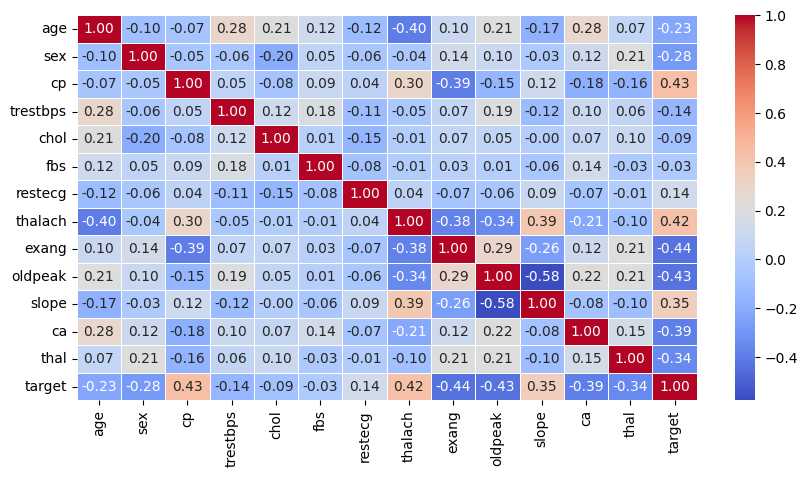

In [106]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.show()

In [107]:
# Patients having a heart disease & not having a heart disease
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Data Visualization:

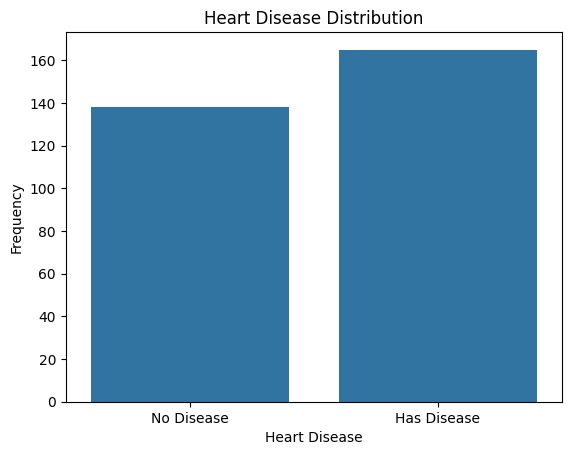

In [108]:
# Visualize the patients having a heart disease & not having a heart disease
heart_disease = df["target"].value_counts()

sns.barplot(x=heart_disease.index, y=heart_disease)
plt.xticks(ticks=[0, 1], labels=["No Disease", "Has Disease"])
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.show()

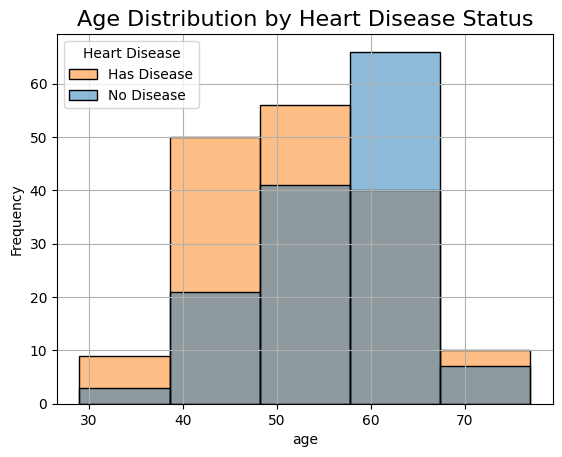

In [109]:
# Visualize the age and whether a patient has disease or not
sns.histplot(data=df, x="age", hue="target", bins=5)

plt.title("Age Distribution by Heart Disease Status", fontsize=16)
plt.ylabel("Frequency")
plt.legend(title="Heart Disease", labels=["Has Disease", "No Disease"])
plt.grid()
plt.show()

### Split the data 

In [110]:
x = df.drop(columns=["target"])
y = df["target"]

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Data Preprocessing:

In [112]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
# x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

### Logistic Regression model:

In [183]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")
print(f"Confusion Metrix:\n {confusion_matrix(y_test, y_pred_lr)}")

Accuracy: 81.32%
Confusion Metrix:
 [[32  9]
 [ 8 42]]


### Decision Tree model:

In [114]:
dt_model = DecisionTreeClassifier(max_leaf_nodes = 10, max_depth=3, criterion='entropy')
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)*100:.2f}%")
print(f"Confusion Metrix:\n {confusion_matrix(y_test, y_pred_dt)}")

Accuracy: 76.92%
Confusion Metrix:
 [[32  9]
 [12 38]]


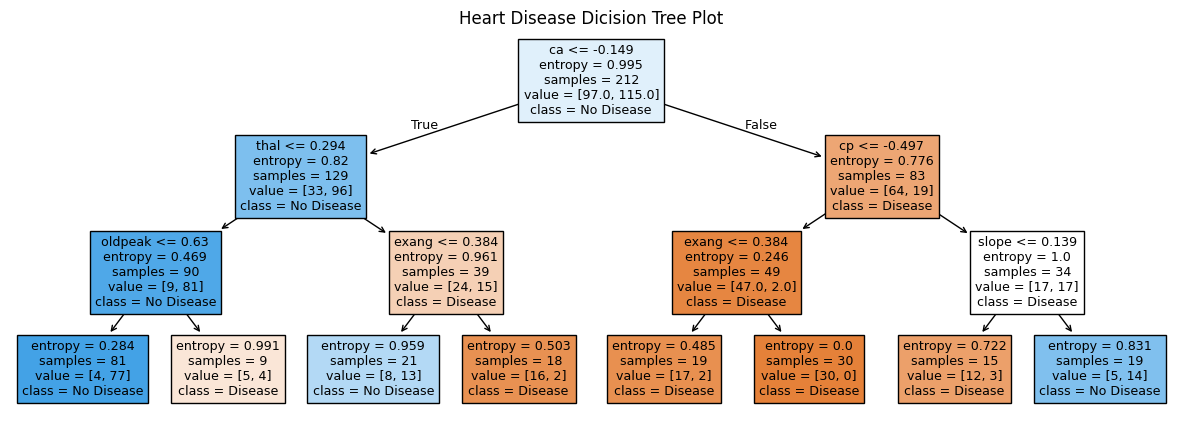

In [162]:
# Plot the tree
plt.figure(figsize=(15, 5))
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=["No Disease" if i==0 else "Disease" for i in y.unique()])
plt.title("Heart Disease Dicision Tree Plot")
plt.show()

In [116]:
# # Export the tree to a DOT file
# dot_data = export_graphviz(
#     dt_model,
#     out_file = None,  # Keeps it in memory
#     feature_names = x.columns,
#     class_names = [str(i) for i in y.unique()],
#     filled = True,
#     rounded = True,
#     special_characters = True
# )

# # Visualize the decision tree
# graph = graphviz.Source(dot_data)
# # graph.render("decision_tree")  # Saves the visualization as a file
# graph.view()  # Opens the visualization

### Random Forest model:

In [189]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # 100 trees
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(f"Confusion Metrix:\n {confusion_matrix(y_test, y_pred_rf)}")

Accuracy: 86.81%
Confusion Metrix:
 [[33  8]
 [ 4 46]]


* Visualize an Individual Tree from the Random Forest

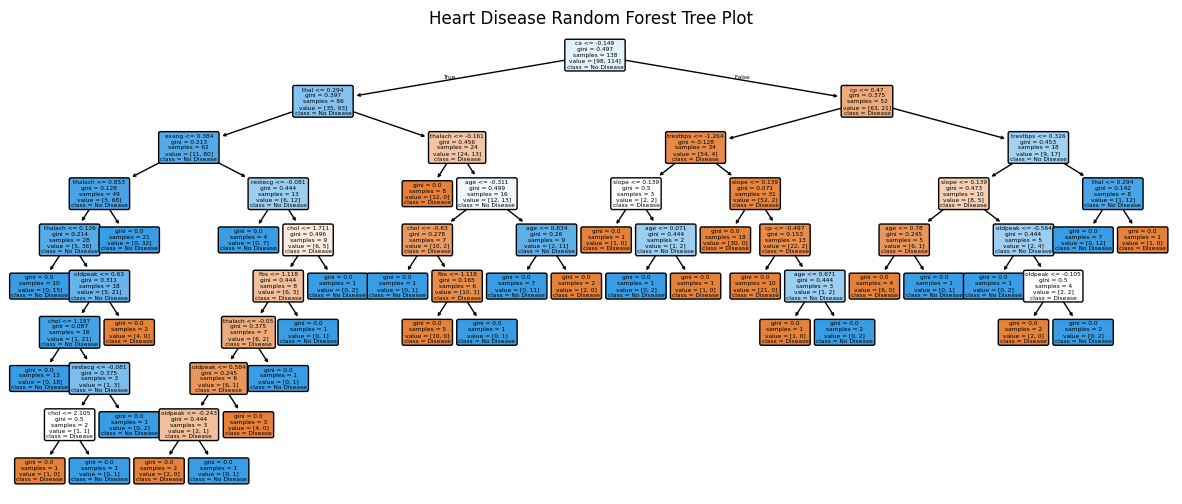

In [182]:
# Extract one tree from the Random Forest
tree_index = 0  # Index of the tree to visualize
single_tree = rf_model.estimators_[tree_index]

plt.figure(figsize=(15, 6))
plot_tree(single_tree, feature_names = x.columns, filled = True, rounded = True,
    class_names = ["No Disease" if i==0 else "Disease" for i in y.unique()])
plt.title("Heart Disease Random Forest Tree Plot")
plt.show()

In [170]:
# # Extract one tree from the Random Forest
# tree_index = 0  # Index of the tree to visualize
# single_tree = rf_model.estimators_[tree_index]

# # Export the tree as a DOT file
# dot_data = export_graphviz(
#     single_tree,  # The extracted tree
#     out_file = None,  # Keeps it in memory
#     feature_names = x.columns,
#     class_names = ["No Disease" if i==0 else "Disease" for i in y.unique()],
#     filled = True,  # Fill nodes with color
#     rounded = True,  # Rounded edges
#     special_characters = True  # Allows special characters
# )

# # Render and visualize the tree using Graphviz
# graph = graphviz.Source(dot_data)
# graph.render("random_forest_tree")  # Save the tree visualization to a file
# graph.view()  # Opens the file


In [129]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(x_test)
best_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"\nBest Random Forest Model Accuracy: {best_accuracy*100:.2f}% \n\nBest Random Forest Model Confusion Metrix:\n{confusion_matrix(y_test, y_pred_best_rf)}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Model Accuracy: 79.12% 

Best Random Forest Model Confusion Metrix:
[[32  9]
 [10 40]]


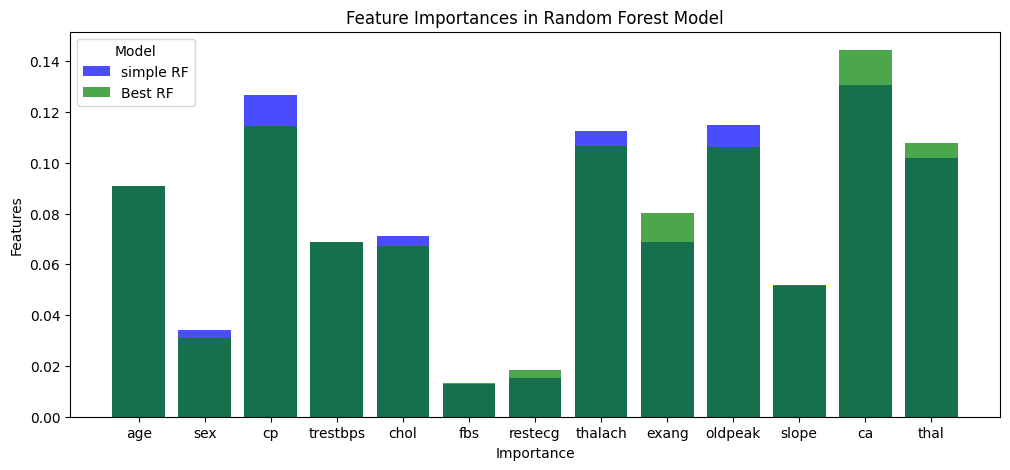

In [148]:
# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
best_feature_importances = best_rf_model.feature_importances_

features = x.columns
# Plot feature importances
plt.figure(figsize=(12, 5))
plt.bar(features, feature_importances, color="blue", alpha=0.7, label="simple RF")
plt.bar(features, best_feature_importances, color="green", alpha=0.7, label="Best RF")
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.legend(title="Model")
plt.show()

### Select the best model

* Train Multiple Models

In [194]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in classifiers.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": cr
    }

# Display results
for name, metrics in results.items():
    print(f"Model: {name} \tAccuracy: {metrics['Accuracy']*100:.2f}%")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("="*60)

Model: Logistic Regression 	Accuracy: 81.32%
Confusion Matrix:
[[32  9]
 [ 8 42]]
Classification Report:
{'0': {'precision': 0.8, 'recall': 0.7804878048780488, 'f1-score': 0.7901234567901234, 'support': 41.0}, '1': {'precision': 0.8235294117647058, 'recall': 0.84, 'f1-score': 0.8316831683168316, 'support': 50.0}, 'accuracy': 0.8131868131868132, 'macro avg': {'precision': 0.8117647058823529, 'recall': 0.8102439024390244, 'f1-score': 0.8109033125534775, 'support': 91.0}, 'weighted avg': {'precision': 0.8129282482223658, 'recall': 0.8131868131868132, 'f1-score': 0.8129584631234796, 'support': 91.0}}
Model: Decision Tree 	Accuracy: 76.92%
Confusion Matrix:
[[32  9]
 [12 38]]
Classification Report:
{'0': {'precision': 0.7272727272727273, 'recall': 0.7804878048780488, 'f1-score': 0.7529411764705882, 'support': 41.0}, '1': {'precision': 0.8085106382978723, 'recall': 0.76, 'f1-score': 0.7835051546391752, 'support': 50.0}, 'accuracy': 0.7692307692307693, 'macro avg': {'precision': 0.76789168278

* Visualize Confusion Matrices using Heatmaps

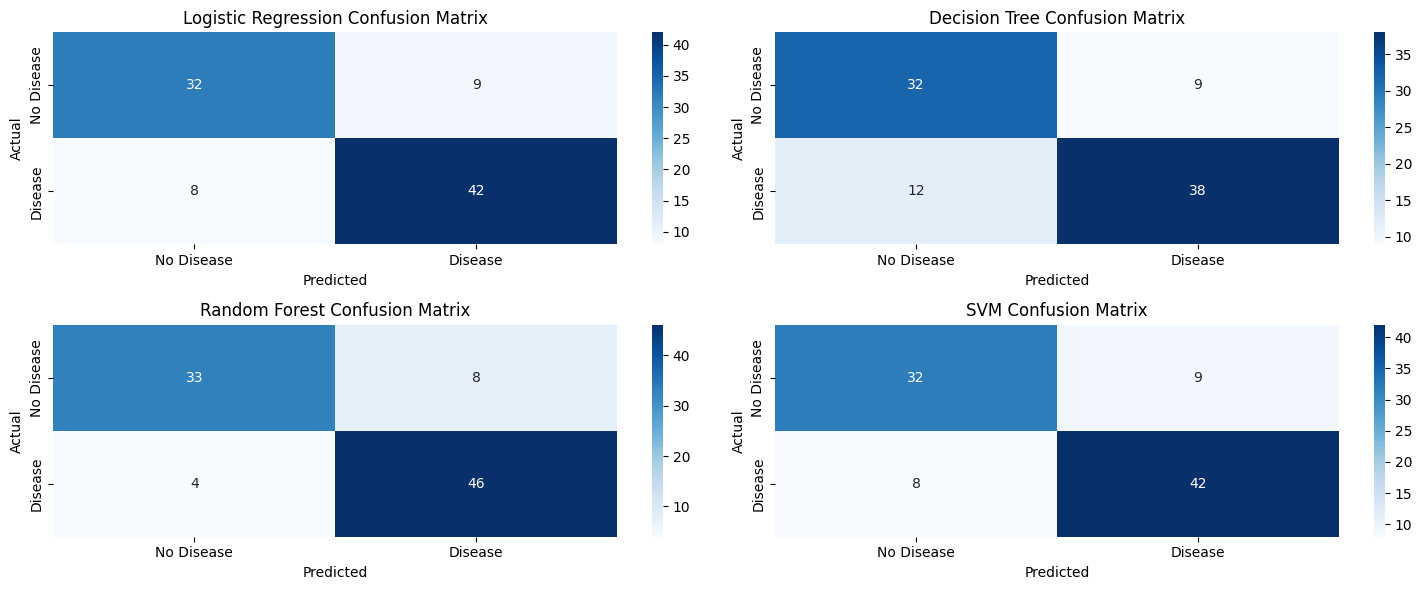

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten()

for idx, (name, metrics) in enumerate(results.items()):
    sns.heatmap(
        metrics["Confusion Matrix"],
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Disease", "Disease"],
        yticklabels=["No Disease", "Disease"],
        ax=axes[idx]
    )
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()

* Find the best model based on accuracy

In [200]:
best_model = max(results.items(), key=lambda x: x[1]["Accuracy"])

print(f"Best Model: {best_model[0]}")
print(f"Accuracy: {best_model[1]['Accuracy']*100:.2f}%")
print(f"Precision: {best_model[1]['Precision']:.2f}")
print(f"Recall: {best_model[1]['Recall']:.2f}")
print(f"F1 Score: {best_model[1]['F1 Score']:.2f}")

Best Model: Random Forest
Accuracy: 86.81%
Precision: 0.85
Recall: 0.92
F1 Score: 0.88
